In [1]:
import numpy as np
import pandas as pd
import base64
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, LeavePOut, RepeatedStratifiedKFold, RepeatedKFold
from sklearn.preprocessing import LabelEncoder, minmax_scale, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree, export_text
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, Dropout, Activation, Flatten
from sklearn.metrics import (accuracy_score,confusion_matrix, ConfusionMatrixDisplay, r2_score, silhouette_score, 
balanced_accuracy_score,cohen_kappa_score, recall_score, precision_score, f1_score)
from kneed import knee_locator, KneeLocator
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("E:/Python Programs/EuroAstro/y1.csv")
df.head()

,Train_Test,Weekday,Date,Month,Year,Lagna,Lagna Padam,Sun,Sun Padam,Moon,...,Jupiter Padam,Venus,Venus Padam,Saturn,Saturn Padam,Rahu,Rahu Padam,Ketu,Ketu Padam,y1
0,Train,Tuesday,4,1,2022,10,3,20,3,22,...,1,21,1,22,3,3,3,17,1,18
1,Train,Friday,7,1,2022,10,3,20,4,25,...,1,20,4,22,3,3,3,17,1,2
2,Train,Tuesday,11,1,2022,10,4,21,1,2,...,1,20,3,22,3,3,3,17,1,4
3,Train,Friday,14,1,2022,11,1,21,2,5,...,1,20,3,22,3,3,3,17,1,6
4,Train,Tuesday,18,1,2022,11,2,21,3,8,...,2,20,2,22,3,3,3,17,1,3


In [3]:
encoding = LabelEncoder()
df["Weekday"] = encoding.fit_transform(df["Weekday"])
df["Year"] = encoding.fit_transform(df["Year"])

In [4]:
# 0 means Friday; 1 means Tuesday
# 0 means 2022; 1 means 2023; 2 means 2024

df.head()

,Train_Test,Weekday,Date,Month,Year,Lagna,Lagna Padam,Sun,Sun Padam,Moon,...,Jupiter Padam,Venus,Venus Padam,Saturn,Saturn Padam,Rahu,Rahu Padam,Ketu,Ketu Padam,y1
0,Train,1,4,1,0,10,3,20,3,22,...,1,21,1,22,3,3,3,17,1,18
1,Train,0,7,1,0,10,3,20,4,25,...,1,20,4,22,3,3,3,17,1,2
2,Train,1,11,1,0,10,4,21,1,2,...,1,20,3,22,3,3,3,17,1,4
3,Train,0,14,1,0,11,1,21,2,5,...,1,20,3,22,3,3,3,17,1,6
4,Train,1,18,1,0,11,2,21,3,8,...,2,20,2,22,3,3,3,17,1,3


In [5]:
df_train = df[df['Train_Test'] == 'Train']
df_test = df[df['Train_Test'] == 'Test']

In [6]:
df_train.head()

,Train_Test,Weekday,Date,Month,Year,Lagna,Lagna Padam,Sun,Sun Padam,Moon,...,Jupiter Padam,Venus,Venus Padam,Saturn,Saturn Padam,Rahu,Rahu Padam,Ketu,Ketu Padam,y1
0,Train,1,4,1,0,10,3,20,3,22,...,1,21,1,22,3,3,3,17,1,18
1,Train,0,7,1,0,10,3,20,4,25,...,1,20,4,22,3,3,3,17,1,2
2,Train,1,11,1,0,10,4,21,1,2,...,1,20,3,22,3,3,3,17,1,4
3,Train,0,14,1,0,11,1,21,2,5,...,1,20,3,22,3,3,3,17,1,6
4,Train,1,18,1,0,11,2,21,3,8,...,2,20,2,22,3,3,3,17,1,3


In [7]:
df_test.head()

,Train_Test,Weekday,Date,Month,Year,Lagna,Lagna Padam,Sun,Sun Padam,Moon,...,Jupiter Padam,Venus,Venus Padam,Saturn,Saturn Padam,Rahu,Rahu Padam,Ketu,Ketu Padam,y1
28,Test,1,12,4,0,14,4,27,4,10,...,3,24,3,23,2,3,1,16,3,21
85,Test,0,28,10,0,6,1,15,2,18,...,1,15,2,23,1,2,2,15,4,14
156,Test,1,4,7,1,19,1,6,4,21,...,1,9,4,24,2,1,2,14,4,14
174,Test,1,5,9,1,27,1,11,2,3,...,3,9,1,24,1,1,1,14,3,1
179,Test,0,22,9,1,2,4,12,3,19,...,3,9,3,24,1,1,1,14,3,3


In [8]:
df_train.reset_index(inplace=True, drop=True)
df_test.reset_index(inplace=True, drop=True)

df_train.drop(labels='Train_Test', axis=1, inplace=True)
df_test.drop(labels='Train_Test', axis=1, inplace=True)

In [9]:
X_train_notscaled, y_train = df_train[["Weekday","Date","Month","Year","Lagna","Lagna Padam","Sun","Sun Padam","Moon","Moon Padam","Mars","Mars Padam","Mercury","Mercury Padam","Jupiter","Jupiter Padam","Venus","Venus Padam","Saturn","Saturn Padam","Rahu","Rahu Padam","Ketu","Ketu Padam"]], df_train["y1"]
X_train_notscaled.shape, y_train.shape

((221, 24), (221,))

In [10]:
X_test_notscaled, y_test = df_test[["Weekday","Date","Month","Year","Lagna","Lagna Padam","Sun","Sun Padam","Moon","Moon Padam","Mars","Mars Padam","Mercury","Mercury Padam","Jupiter","Jupiter Padam","Venus","Venus Padam","Saturn","Saturn Padam","Rahu","Rahu Padam","Ketu","Ketu Padam"]], df_test["y1"]
X_test_notscaled.shape, y_test.shape

((45, 24), (45,))

In [14]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_notscaled)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.004535,-1.321951,-1.435816,-0.971055,-0.589420,0.453360,0.710197,0.479301,1.076066,0.477435,...,0.654691,-1.298712,0.890414,-1.213807,-2.149589,0.889021,-0.327571,0.478685,1.999114,-1.312571
1,-0.995485,-0.975664,-1.435816,-0.971055,-0.589420,0.453360,0.710197,1.369432,1.460666,1.387031,...,0.654691,-1.298712,0.760697,1.433411,-2.149589,0.889021,-0.327571,0.478685,1.999114,-1.312571
2,1.004535,-0.513947,-1.435816,-0.971055,-0.589420,1.355995,0.833201,-1.300961,-1.487930,0.477435,...,0.654691,-1.298712,0.760697,0.551005,-2.149589,0.889021,-0.327571,0.478685,1.999114,-1.312571
3,-0.995485,-0.167660,-1.435816,-0.971055,-0.413865,-1.351910,0.833201,-0.410830,-1.103331,-1.341757,...,0.654691,-1.298712,0.760697,0.551005,-2.149589,0.889021,-0.327571,0.478685,1.999114,-1.312571
4,1.004535,0.294057,-1.435816,-0.971055,-0.413865,-0.449275,0.833201,0.479301,-0.718731,1.387031,...,0.654691,-0.418297,0.760697,-0.331401,-2.149589,0.889021,-0.327571,0.478685,1.999114,-1.312571


In [15]:
X_test_scaled = scaler.fit_transform(X_test_notscaled)
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.978019,-0.467262,-0.628786,-3.250,-0.140681,1.236508,1.612886,1.162087,-0.493279,0.22672,...,4.441875,0.461293,1.335794,0.425436,-2.372321,-0.090259,-2.373260,-0.937006,4.022543,0.117202
1,-1.022475,1.275891,1.576049,-3.250,-1.887060,-1.254963,0.301202,-0.739510,0.602897,0.22672,...,4.650088,-1.343768,0.285315,-0.531795,-2.372321,-1.105670,-2.488967,-0.039873,2.475411,1.172018
2,0.978019,-1.338838,0.473631,-1.375,0.950807,-1.254963,-0.682562,1.162087,1.013963,1.15421,...,-0.347021,-1.343768,-0.415004,1.382666,-0.754829,-0.090259,-2.604673,-0.039873,0.928279,1.172018
3,0.978019,-1.229891,1.208576,-1.375,2.697187,-1.254963,-0.136027,-0.739510,-1.452433,0.22672,...,-0.347021,0.461293,-0.415004,-1.489025,-0.754829,-1.105670,-2.604673,-0.937006,0.928279,0.117202
4,-1.022475,0.622209,1.208576,-1.375,-2.760250,1.236508,-0.026720,0.211289,0.739919,-0.70077,...,-0.347021,0.461293,-0.415004,0.425436,-0.754829,-1.105670,-2.604673,-0.937006,0.928279,0.117202


In [16]:
covariance_matrix = np.cov([X_train_scaled.iloc[:,0],X_train_scaled.iloc[:,1],X_train_scaled.iloc[:,1],X_train_scaled.iloc[:,3],
                           X_train_scaled.iloc[:,4],X_train_scaled.iloc[:,5],X_train_scaled.iloc[:,6],X_train_scaled.iloc[:,7],
                           X_train_scaled.iloc[:,8],X_train_scaled.iloc[:,9],X_train_scaled.iloc[:,10],X_train_scaled.iloc[:,11],
                           X_train_scaled.iloc[:,12],X_train_scaled.iloc[:,13],X_train_scaled.iloc[:,14],X_train_scaled.iloc[:,15],
                           X_train_scaled.iloc[:,16],X_train_scaled.iloc[:,17],X_train_scaled.iloc[:,18],X_train_scaled.iloc[:,19],
                           X_train_scaled.iloc[:,20],X_train_scaled.iloc[:,21],X_train_scaled.iloc[:,22],X_train_scaled.iloc[:,23]])
print("Covariance Matrix:\n", covariance_matrix)

Covariance Matrix:
 [[ 1.00454545e+00  2.33234783e-02  2.33234783e-02  1.81530724e-02
  -2.28563427e-02 -3.89871021e-02 -1.10558259e-02  1.31342348e-01
   6.18065571e-03 -2.17018124e-03 -1.16048135e-02 -2.81523500e-02
   5.45457166e-02  2.57614074e-02  6.66741265e-03 -1.81082727e-02
  -1.09922231e-03 -1.85485030e-02 -4.52958307e-03  2.27510784e-02
   1.45355241e-02 -1.47201844e-02 -1.84275362e-02  2.57643469e-02]
 [ 2.33234783e-02  1.00454545e+00  1.00454545e+00 -2.47820812e-02
  -2.37151744e-03  5.80740318e-04 -8.09704955e-02 -5.05113148e-02
  -4.68580909e-02 -6.44820516e-03 -3.94023599e-02 -5.81256361e-02
  -5.23112212e-02 -4.42811354e-02  9.28301802e-03 -1.45561598e-02
  -7.06853385e-02  5.62257588e-02  4.81573484e-02  3.86453399e-03
  -7.37989799e-02 -3.95602514e-02 -1.69432451e-02  7.00258247e-03]
 [ 2.33234783e-02  1.00454545e+00  1.00454545e+00 -2.47820812e-02
  -2.37151744e-03  5.80740318e-04 -8.09704955e-02 -5.05113148e-02
  -4.68580909e-02 -6.44820516e-03 -3.94023599e-02 -5.8

In [17]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [18]:
eigen_values

array([ 3.86210591e+00,  3.02634495e+00,  2.08879752e+00,  1.85550089e+00,
        1.44063865e+00,  2.55372354e-02,  2.99864962e-02,  1.37552307e-01,
        2.20105648e-01,  2.56228102e-01,  3.39264462e-01,  4.47976267e-01,
        1.27524893e+00,  1.21978505e+00,  5.99505307e-01,  7.28853792e-01,
        1.05671394e+00,  1.02532806e+00,  8.09730911e-01,  8.51675870e-01,
        9.54022321e-01,  9.39344069e-01,  9.18844225e-01, -6.87277922e-17])

In [19]:
eigen_vectors

array([[-5.00872196e-03, -2.02845014e-02, -2.77486247e-02,
        -1.29412183e-02, -9.65267959e-02,  1.01576180e-02,
         3.67457634e-03, -3.02070322e-02, -3.26116761e-02,
         4.96903061e-02,  1.44902429e-02, -8.86203732e-03,
         2.06423530e-01, -3.90796430e-01,  3.96081019e-02,
         1.85596336e-01, -4.85436760e-01, -1.91494779e-01,
         3.45654141e-01, -2.02021794e-01,  3.04028918e-01,
        -4.54076558e-01, -1.47929559e-01,  1.28219212e-17],
       [ 6.65671759e-03,  1.04670997e-01, -5.92427932e-01,
        -3.44048648e-01,  2.32981721e-02, -9.93471438e-03,
        -1.32420855e-02, -1.72586474e-02, -1.26480166e-02,
         2.30659799e-03, -6.48094290e-03, -1.24854213e-02,
         3.69363004e-02, -4.60798423e-02,  1.98625948e-02,
        -6.05483411e-02,  5.84147409e-02, -1.33608351e-02,
         1.58853419e-02,  3.52095650e-02,  4.85466151e-02,
         5.14732388e-02, -2.33250866e-02, -7.07106781e-01],
       [ 6.65671759e-03,  1.04670997e-01, -5.92427932e

In [22]:
for i in eigen_vectors:
    sum = np.sum(i)
    print(sum)

-0.9466227184677549
-1.4556864131129426
-0.04147285073986162
-0.8002277754384586
1.0263168975223327
-0.6632966458785094
0.12128431436640652
-1.4187192462834055
0.9731633299081721
-1.9216470218570096
1.2988486825072174
0.8652976618462667
-0.11210922763059683
-0.30980695113200685
1.5241386660650944
0.3905266089868943
-1.511834608126088
-0.7509661407894254
0.7170353982690995
1.374400372470863
-1.085787229920614
0.20515301684753062
0.4654225211053689
-0.6870985537228056


In [26]:
pc = eigen_vectors[[10,14,19]]
pc

array([[-1.17251628e-01, -1.90176557e-01, -2.56373717e-02,
         8.04659623e-02,  5.52806116e-01,  2.09087486e-01,
        -1.32746750e-01,  2.26062349e-01, -4.92306244e-02,
         1.99793213e-01,  2.95128506e-01,  1.47011259e-01,
         1.22699802e-01, -2.31362372e-01,  2.98580047e-01,
        -1.61314341e-01,  1.67534876e-01,  9.08326691e-03,
         2.67786938e-01, -1.04273080e-01, -2.81326851e-01,
         1.11710586e-03,  1.50113299e-02, -1.30386468e-16],
       [ 4.48305157e-01, -5.18301126e-02,  7.09142113e-03,
        -2.48462048e-02, -1.14146001e-01,  2.00401356e-01,
        -7.96615089e-02,  2.63046420e-01,  6.17853012e-01,
         4.12827832e-01, -2.85659469e-01,  4.70413060e-03,
        -2.00621444e-02, -7.75581079e-02,  2.56859519e-02,
         4.24391549e-02,  1.30642216e-01,  3.62942526e-03,
         1.80058346e-02,  4.93583412e-02,  3.40579878e-02,
        -3.48178436e-02, -4.53281837e-02, -2.17813626e-16],
       [ 8.28000302e-02, -1.26007529e-01,  4.10769933e

In [28]:
trans_X_train_scaled = np.dot(X_train_scaled.iloc[:,0:24], pc.T)
trans_X_train_scaled

array([[-1.67668567e-01,  1.24909416e+00,  9.92586283e-01],
       [ 1.13938819e+00,  1.38311958e+00,  1.00626275e+00],
       [ 2.75822842e-01, -5.40457858e-01,  9.62832863e-01],
       [-2.05839525e-01, -2.29697356e+00,  1.03692155e+00],
       [-1.46000551e-01,  3.40414617e-01,  5.13105209e-01],
       [ 2.66421424e-01, -3.56020842e-01,  8.35576760e-01],
       [-7.98709421e-01,  1.71364978e-01,  1.04763168e+00],
       [ 1.28212114e-01,  3.53859974e-01,  8.73875610e-01],
       [-4.37620414e-02,  7.35001964e-01,  1.99972750e+00],
       [-2.18867692e-01,  2.80927616e-01,  1.25191850e+00],
       [-8.85349132e-01, -1.49195042e+00,  1.02600861e+00],
       [ 2.13841272e-01, -7.03343465e-01,  9.00603808e-01],
       [-5.66867389e-01, -1.63993794e-01,  1.65588498e+00],
       [ 7.07465605e-01, -4.97990033e-01,  8.94471153e-01],
       [-4.87924127e-01, -2.55292995e-01, -1.09301916e-01],
       [-3.61997013e-01, -6.25623196e-01, -2.31238226e-01],
       [ 1.24521364e+00,  1.90110061e+00

In [48]:
X_train_scaled.iloc[:,0:24].shape, pc.shape

((221, 24), (3, 24))

In [29]:
new_X_train = pd.DataFrame(trans_X_train_scaled, columns = ['PC1','PC2','PC3'])
new_X_train

,PC1,PC2,PC3
0,-0.167669,1.249094,0.992586
1,1.139388,1.383120,1.006263
2,0.275823,-0.540458,0.962833
3,-0.205840,-2.296974,1.036922
4,-0.146001,0.340415,0.513105
...,...,...,...
216,0.471062,-0.099500,-1.102971
217,1.272418,-0.089902,-0.654311
218,0.748069,-1.164274,0.453314
219,-0.184227,-1.627512,-1.163165


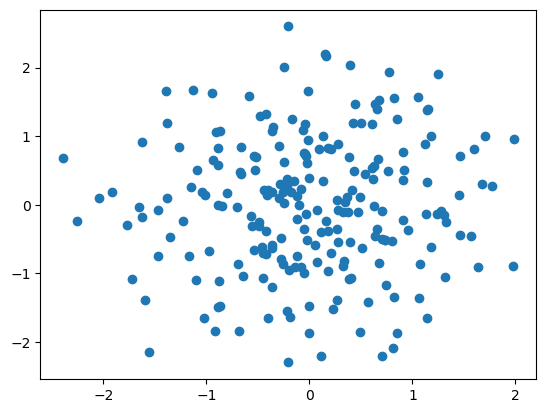

In [30]:
plt.scatter("PC1","PC2",data = new_X_train)
plt.show()

In [31]:
trans_X_test_scaled = np.dot(X_test_scaled.iloc[:,0:24], pc.T)
trans_X_test_scaled

array([[ 1.70654742,  0.57578341,  0.11803812],
       [-0.65662692, -0.21970937, -1.9170217 ],
       [ 1.22002306,  1.64484229, -0.08364489],
       [ 1.10983915, -1.1870238 ,  0.89625554],
       [-0.98862166,  0.24175472, -1.50626255],
       [-0.075214  ,  0.96527523, -0.92342335],
       [-1.84599933,  0.02687323,  0.72628843],
       [-1.40886109, -0.01149643, -0.19306688],
       [-1.60399284, -0.82438985,  0.73201904],
       [-2.09258288,  0.73321734,  0.67405358],
       [-1.58065478,  1.37654603,  0.1460328 ],
       [-1.00354148, -0.29913609,  0.45959931],
       [ 0.97160238, -0.79891922,  0.70831662],
       [-0.4414948 ,  0.53335964,  0.81463427],
       [ 0.13449746, -0.15140834,  1.22798714],
       [-0.48552586,  0.34469375,  0.57175841],
       [-0.3734506 , -1.69226347,  1.1817481 ],
       [-0.98356916, -1.2773436 ,  1.19258938],
       [-0.27027429, -0.5867982 ,  1.25528945],
       [-0.37421865, -0.28550693,  0.06027798],
       [-1.09888759,  0.05909703,  0.620

In [32]:
new_X_test = pd.DataFrame(trans_X_test_scaled, columns = ['PC1','PC2','PC3'])
new_X_test.head()

,PC1,PC2,PC3
0,1.706547,0.575783,0.118038
1,-0.656627,-0.219709,-1.917022
2,1.220023,1.644842,-0.083645
3,1.109839,-1.187024,0.896256
4,-0.988622,0.241755,-1.506263


In [33]:
model = LogisticRegression()
model.fit(new_X_train, y_train)

LogisticRegression()

In [34]:
model.score(new_X_test, y_test)

0.044444444444444446

In [35]:
w, b = model.coef_, model.intercept_
w, b

(array([[ 0.39910367, -0.13470085,  0.07221633],
        [-0.17916728,  0.12331589,  0.14077556],
        [ 0.53176897, -0.01964759, -0.25073874],
        [ 0.20803359,  0.15775588,  0.05349405],
        [ 0.51630722, -0.16927794, -0.34495902],
        [ 0.26841306, -0.2003441 ,  0.33778861],
        [ 0.31554984, -0.27667043,  0.26348889],
        [-0.21383121,  0.10748138,  0.35602044],
        [-0.53745124,  0.13913179,  0.05961549],
        [-0.13149549, -0.31282358, -0.0641877 ],
        [-0.30911817,  0.3616167 , -0.31756213],
        [ 0.70152654, -0.16107508, -0.52155733],
        [-0.39340172,  0.31966313,  0.5712683 ],
        [ 0.06857864,  1.00827641,  0.17455936],
        [ 0.01012897, -0.46440589, -0.65888401],
        [ 0.08832139, -0.19578936,  0.1381369 ],
        [ 0.60892634,  0.44603138, -0.20694169],
        [ 0.05542083,  0.18615791, -0.31790253],
        [-0.44698646,  0.76410466,  0.19003049],
        [ 0.21762182,  0.04101256, -0.28144855],
        [-0.90484673

In [41]:
model_dt=DecisionTreeClassifier(criterion="entropy", max_depth=3, max_leaf_nodes=10)
model_dt.fit(new_X_train, y_train)
model_dt.score(new_X_test, y_test)

0.06666666666666667

In [42]:
model_dt.get_depth(), model_dt.get_n_leaves()

(3, 8)

In [43]:
model_knn = KNeighborsClassifier(n_neighbors=5, weights="distance", p=1)
model_knn.fit(new_X_train, y_train)

KNeighborsClassifier(p=1, weights='distance')

In [45]:
y_predict_knn = model_knn.predict(new_X_test)
y_predict_knn

array([ 8, 12,  4,  7,  5, 26,  8, 11, 10, 19,  8,  8,  7,  2,  9,  2,  6,
        6,  3, 23,  8,  2,  3,  8,  4, 17,  3, 18,  5,  5,  2,  5, 23,  8,
       13,  5, 11,  3, 10,  4,  1,  5,  1,  2,  5], dtype=int64)

In [46]:
accuracy_score(y_test, y_predict_knn)

0.06666666666666667